<a href="https://colab.research.google.com/github/jmlucasusc4/Bagging_Boosting_Project/blob/main/Bagging_Boosting_Project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [7]:
df = pd.read_csv('/content/talking_data.csv')
df.head(30)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0


In [8]:
df.shape

(100000, 8)

In [9]:
df.info() # Data Types of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


###Checking the presence of missing values

In [10]:
df.isnull().values.any()

True

In [11]:
#Identifing missing Values
miss_val = df.isna().sum()
miss_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [12]:
df=df.drop(['attributed_time'],axis=1)

In [13]:
miss_val = df.isna().sum()
miss_val

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

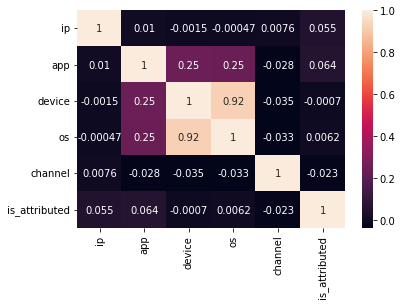

In [14]:
df_corr=df.corr()
sns.heatmap(df_corr,annot=True)
plt.show()

In [15]:
X=df.drop(['is_attributed','click_time'],axis=1)

In [16]:
X.head()

,ip,app,device,os,channel
0,87540,12,1,13,497
1,105560,25,1,17,259
2,101424,12,1,19,212
3,94584,13,1,13,477
4,68413,12,1,1,178


In [17]:
Y=df['is_attributed']

In [18]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_attributed, dtype: int64

In [19]:
#Split our data

from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [21]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 5)
(20000, 5)
(80000,)
(20000,)


###Bagging

In [22]:
from sklearn.ensemble import BaggingClassifier

In [23]:
X.head()

,ip,app,device,os,channel
0,87540,12,1,13,497
1,105560,25,1,17,259
2,101424,12,1,19,212
3,94584,13,1,13,477
4,68413,12,1,1,178


In [24]:
model= BaggingClassifier(n_estimators=10,max_samples=0.7,bootstrap=True)
model=model.fit(x_train,y_train)
model_prediction=model.predict(x_test)
model_score=model.score(x_test,y_test)
print('Bagging Classifier Accuracy is{}'.format(model_score))

Bagging Classifier Accuracy is0.9973


In [55]:
model_pred=model.predict_proba(x_test)

In [57]:
ROC=metrics.roc_auc_score(y_test,model_pred[:,1])
print(ROC)

0.8402563792573022


###Boosting

In [25]:
pip install Xgboost

In [29]:
pip install xgboost

In [35]:
import xgboost as XGB
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(x_train, y_train)
test_pred = gbcl.predict(x_test)
gbcl_score=gbcl.score(x_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Gradient Boost classifier model accuracy is 0.99755
The confusion matrix of Gradient Boost classifier model is
[[19945     4]
 [   45     6]]


###AUC/ROC 

In [46]:
y_pred=gbcl.predict_proba(x_test)
y_pred

array([[9.99410534e-01, 5.89466399e-04],
       [9.99237750e-01, 7.62250134e-04],
       [9.99410534e-01, 5.89466399e-04],
       ...,
       [9.99410534e-01, 5.89466399e-04],
       [9.99410534e-01, 5.89466399e-04],
       [9.99410534e-01, 5.89466399e-04]])

In [50]:
ROC=metrics.roc_auc_score(y_test,y_pred[:,1])


In [51]:
print('AUC: % .2f%%'%(ROC*100.0))

AUC:  93.20%


In [53]:
importance=dict(zip(x_train.columns,gbcl.feature_importances_))

### 5 Important features

In [54]:
importance

{'app': 0.2446904377325247,
 'channel': 0.32837790224936897,
 'device': 0.16475176015887547,
 'ip': 0.2361239242563542,
 'os': 0.026055975602876598}